Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Example label: [6]


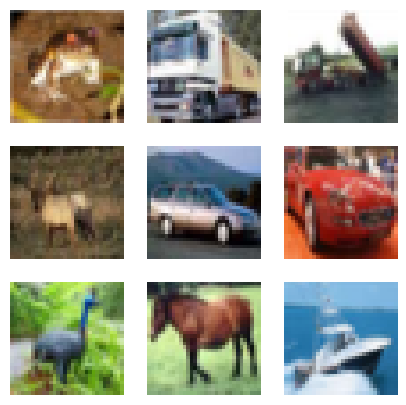

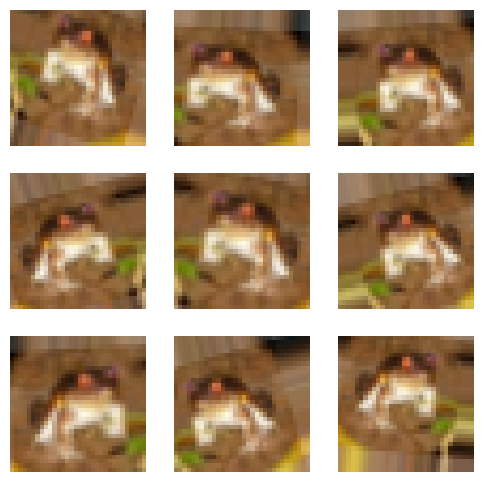

In [7]:
# Image data basics using  CIFAR-10
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Example label:", y_train[0])

# Visualizing the first 9 training images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

#Normalizing the images
x_train = x_train/255.0
x_test = x_test/255.0

#Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

#Visualization after Augmentation
import numpy as np
import matplotlib.pyplot as plt

#Picking one image from training set
sample_image = x_train[0]
sample_image = np.expand_dims(sample_image, axis=0) # adding batch dimension

#Generating the augmented versions
aug_iter = datagen.flow(sample_image, batch_size=1)

#Plotting 9 augmented images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch = next(aug_iter)
    img = batch[0].astype('float32')
    plt.imshow(img)
    plt.axis('off')
plt.show()